In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.array([[0,0,1,1,0,0,0,0],
               [0,0,1,1,0,0,0,1],
               [0,0,1,1,0,0,1,0],
               [0,0,1,1,0,0,1,1],
               [0,0,1,1,0,1,0,0],
               [0,0,1,1,0,1,0,1],
               [0,0,1,1,0,1,1,0],
               [0,0,1,1,0,1,1,1],
               [0,0,1,1,1,0,0,0],
               [0,0,1,1,1,0,0,1]])
Y = np.array([0,1,0,1,0,1,0,1,0,1])


X=np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

Y=np.array([0, 1, 1, 1])

In [8]:
# weights=np.random.randn(2)
in_size=X.shape[1]
weights=np.full(in_size,0.5)
bias=0

In [9]:
def step_function(x):
    return np.where(x>=1,1,0)

def train(inputs,labels,weights,lr,epochs,bias):
    for _ in range(epochs):
        for x,y in zip(inputs,labels):
            summation=np.dot(weights,x)+bias
            prediction=step_function(summation)
            weights+=lr*(y-prediction)*x
            bias+=lr*(y-prediction)
        
def predict(inp):
    summation=np.dot(weights,inp)+bias
    return 0 if summation<1 else 1
    

In [20]:
train(X,Y,weights,0.1,10000,bias)

In [21]:
for i in X:
#     print(i)
    print(predict(i))

0
1
1
1


In [22]:
weights,bias

(array([1.1, 1.1]), 0)

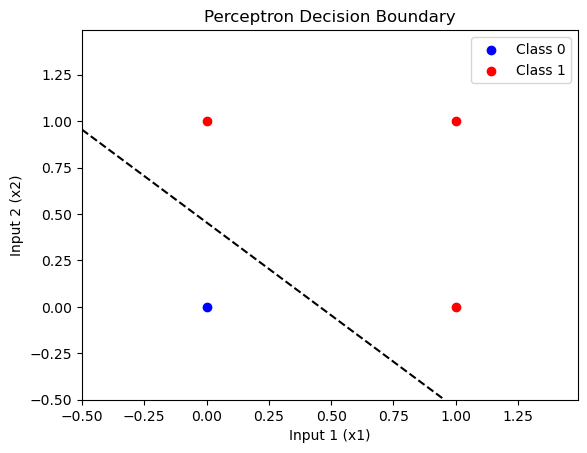

In [23]:
# calculate plot limits
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# generate grid points for contour plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# calculate decision boundary
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = Z.reshape(xx.shape)

# plot the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

# plot the data points
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='red', label='Class 1')

# add labels and title
plt.xlabel('Input 1 (x1)')
plt.ylabel('Input 2 (x2)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()
